# **YOLO DEMO**

Author: Alejandro Meza Tudela

## **YOLO explanation**

YOLO (short for "You Only Look Once") is a highly efficient convolutional neural network (CNN) architecture designed for real-time object detection in images. Unlike traditional methods such as sliding window techniques or region-based approaches like R-CNN, YOLO processes an entire image in a single pass through the network. This one-step detection mechanism enables YOLO to achieve both high speed and accuracy, making it ideal for applications requiring real-time performance.

 For instance, it is widely used in autonomous vehicles for real-time object detection to avoid collisions, in surveillance systems to track moving objects, and in augmented reality (AR) applications to overlay digital content on physical scenes accurately.





As a convolutional neural network (CNN), YOLO utilizes two fundamental mechanisms for processing and analyzing image data:

Pooling Layers: These layers reduce the spatial dimensions of feature maps, helping to retain essential features while minimizing computational complexity.

Max Pooling: A specific type of pooling that selects the maximum value within a defined region of the feature map, emphasizing the most prominent features and improving robustness to spatial variations.



![alt text](https://miro.medium.com/v2/resize:fit:750/format:webp/0*Pfg-fdNTdIuhGfH_.jpeg "Title")


YOLO employs the ReLU (Rectified Linear Unit) activation function throughout its convolutional steps. ReLU activation is utilized at each convolutional layer, but not at pooling layers, as the latter are primarily used to reduce the computational load. The ReLU function modifies the output of each convolutional step by setting all negative values to zero, while leaving positive values unchanged. This allows the network to focus on the most relevant features without distorting the information captured by the layers.

![alt text](https://miro.medium.com/v2/resize:fit:828/format:webp/0*NDJ_NV0oo5gi3uuA.png "Title")


And the whole YOLO network looks like this.

![alt text](https://miro.medium.com/v2/resize:fit:828/format:webp/0*vw1B_QcwqxSbdghf.png "Title")


**So, what about the actual mechanism?**

So, what about the actual mechanism?

While we’ve discussed how YOLO handles object classification, it also needs to determine the location of these objects within an image. YOLO divides a given image or video frame into a grid of N squares. Each grid cell then performs object detection within its area, predicting multiple bounding boxes along with confidence scores for each box (a bounding box represents the model’s prediction of where an object is located in the image).

Subsequently, YOLO filters out bounding boxes with confidence scores below a certain threshold, retaining only those with a high likelihood of containing an object. It then uses these high-confidence boxes to classify the object based on its trained data. This process enables YOLO to detect objects accurately in an image, relying on a pre-existing dataset to learn the characteristics of the objects it identifies.

![alt text](https://miro.medium.com/v2/resize:fit:750/format:webp/0*3TzeNuS7RWrxF7h5.jpg "Title")

What makes YOLO particularly powerful is its exceptional speed and efficiency. By conducting all the necessary computations in a single pass through the network, YOLO enables real-time object detection, making it ideal for applications such as autonomous driving, surveillance, and augmented reality.

In essence, YOLO has revolutionized the field of object detection by offering a fast and accurate solution that identifies objects in images with a single step. This streamlined approach not only enhances performance in real-time applications but also sets a new standard for efficiency in the industry.

## **YOLO code**

**Install dependencies.**

In [ ]:
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-jdkfecup
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-jdkfecup
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=376059 sha256=e501a4ada0f789980bf24f559e15d90e1be616a8e04027ace2b2365279803092
  Stored in directory: /tmp/pip-ephem-wheel-cache-uus67xyl/wheels/39/61/b4/480fbddb4d3d6bc34083e7397bc6f5d1381f79acc68e9f3511
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.8
    Uninstalling pycocotools-2.0.8:
      Successfully uninstalled pycocotools-2.0.8


**Import required dependencies.**

In [ ]:
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

Load pre-trained model.

For this simple demo, we are gonna used YOLO V5.

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 28 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.68 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (11714/11714), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 16.8 MB/s eta 0:00:00


In [ ]:
from yolov5.models.yolo import Model

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True).to(device)
model.eval()

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 107MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

**Running YOLO Object detection on a custom image**

I want to use a custom image for this step, which could be any relevant photo or visual.

In [ ]:
from google.colab import files

# Upload the picture
uploaded = files.upload()

# Save the uploaded picture in the current directory
for filename in uploaded.keys():
    with open(filename, 'wb') as f:
        f.write(uploaded[filename])

    print(f'{filename} saved in the current directory.')

Saving car_demo.jpg to car_demo.jpg
car_demo.jpg saved in the current directory.


Then, we are gonna use a function to preprocess our image.

In [ ]:
!pip install Pillow

In [ ]:
# Obtain absolute path
absolute_path = '/content/yolov5/car_demo.jpg'

In [ ]:
import numpy as np

def preprocess_image(image_path, target_size=(224, 224)):
    # Check if the file exists
    if not os.path.isfile(image_path):
        raise FileNotFoundError(f"Image not found at: {image_path}")

    try:
        # Read the image using OpenCV
        with open(image_path, 'rb') as f:
            image = cv2.imdecode(np.frombuffer(f.read(), np.uint8), cv2.IMREAD_COLOR)

        # Get the original image size
        original_height, original_width = image.shape[:2]

        # Convert the image to RGB format (OpenCV uses BGR by default)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize the image to the target size
        image = cv2.resize(image, target_size)

        # Compute scaling factors for bounding boxes
        scale_x = target_size[1] / original_width
        scale_y = target_size[0] / original_height

        # Convert image to tensor
        image_tensor = torch.tensor(image).permute(2, 0, 1).float() / 255.0
        return image_tensor.unsqueeze(0), scale_x, scale_y

    except FileNotFoundError as e:
        print(f"Image not found at {image_path}: {e}")
        return None, None, None

    except Exception as e:
        print(f"Unable to process image at {image_path}: {e}")
        return None

# Make sure the path is correct
image_tensor,scale_x, scale_y= preprocess_image(absolute_path)
# If the above path is incorrect, replace it with the correct path to your image

outputs = model(image_tensor)[0]

/content/yolov5/models/common.py:865: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Time to check the image shape!!

In [ ]:
outputs.shape

torch.Size([3087, 85])

**Visualize results**

Finally, we are going to see the results!

In [ ]:
from yolov5.utils.general import non_max_suppression

In [ ]:
def draw_boxes(image_path, outputs, scale_x, scale_y, threshold=0.3):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape

    for box in outputs:
        score, label, x1, y1, x2, y2 = box[4].item(), int(box[5].item()), box[0].item(), box[1].item(), box[2].item(), box[3].item()
        if score > threshold:
            # Scale bounding box coordinates
            x1, y1, x2, y2 = int(x1 /scale_x), int(y1 /scale_y), int(x2 /scale_x), int(y2 /scale_y)
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
            text = f"{model.names[label]:s}: {score:.2f}"
            cv2.putText(image, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    return image

In [ ]:
image_tensor,scale_x, scale_y = preprocess_image(absolute_path)
outputs = model(image_tensor)
outputs = non_max_suppression(outputs)[0]

/content/yolov5/models/common.py:865: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


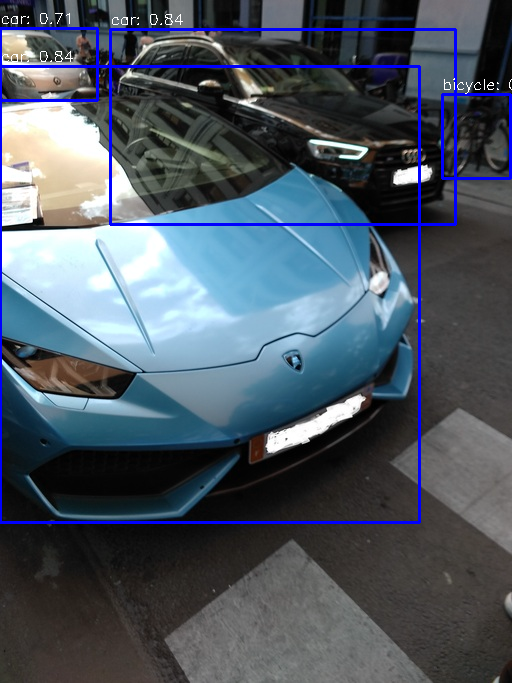

In [ ]:
#check the results
result_image = draw_boxes(absolute_path, outputs,scale_x,scale_y)
cv2_imshow(result_image)

In this notebook, we successfully used YOLOv5 to classify an image, demonstrating its powerful capabilities in real-time object detection. By applying the YOLOv5 model, we were able to accurately identify and localize objects within a custom image, providing valuable insights into the objects present in the scene. This showcases the model’s efficiency and its suitability for various applications such as autonomous driving, surveillance, and augmented reality.



## **Bibliography**

- https://towardsdatascience.com/yolo-you-only-look-once-f05c054a06b4
- https://www.youtube.com/watch?v=JzHNIcvpGk8&t=69s
